<a href="https://colab.research.google.com/github/jacobdwatters/NIOSH-Project/blob/main/ViolationDataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Setup

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load and Process Data

#### Specify columns to use

In [3]:
FEATURES = ['VIOLATION_OCCUR_DT', 'MINE_ID', 'MINE_TYPE', 'COAL_METAL_IND', 'SIG_SUB', 'LIKELIHOOD', 
            'INJ_ILLNESS', 'NO_AFFECTED', 'NEGLIGENCE', 'VIOLATOR_VIOLATION_CNT',
            'VIOLATOR_INSPECTION_DAY_CNT']
TARGETS = ['PROPOSED_PENALTY']

#### Load the data using the specified columns

In [4]:
violation_data = pd.read_csv("https://arlweb.msha.gov/OpenGovernmentData/DataSets/Violations.zip", 
                             encoding='latin-1', compression='zip', sep='|', 
                             usecols = [*FEATURES, *TARGETS])

#### Fill NA Values

Also, create a column 'YEAR_OCCUR' which stores the year the violation occured and drop the 'VIOLATION_OCCUR_DT' column.

In [5]:
violation_data['MINE_TYPE'].fillna('Facility', inplace=True)
violation_data['COAL_METAL_IND'].fillna('M', inplace=True)
violation_data['SIG_SUB'].fillna('N', inplace=True)
violation_data['LIKELIHOOD'].fillna('NoLikelihood', inplace=True)
violation_data['INJ_ILLNESS'].fillna('NoLostDays', inplace=True)
violation_data['NO_AFFECTED'].fillna(0, inplace=True)
violation_data['NEGLIGENCE'].fillna('NoNegligence', inplace=True)
violation_data['VIOLATOR_VIOLATION_CNT'].fillna(0, inplace=True)
violation_data['VIOLATOR_INSPECTION_DAY_CNT'].fillna(0, inplace=True)
violation_data['PROPOSED_PENALTY'].fillna(violation_data['PROPOSED_PENALTY'].mean(), inplace=True)

violation_data['VIOLATION_OCCUR_DT'] = pd.to_datetime(violation_data['VIOLATION_OCCUR_DT'], format='%m/%d/%Y', exact=False)
violation_data.reset_index(inplace=True)

violation_data['YEAR_OCCUR'] = violation_data['VIOLATION_OCCUR_DT'].dt.year

violation_data['YEAR_OCCUR'].fillna('1999', inplace=True)
violation_data = violation_data._convert(numeric=True)

violation_data = violation_data.drop(columns=['VIOLATION_OCCUR_DT'])
violation_data = violation_data.drop(columns=['index'])

#### Save data to Google drive

In [7]:
path = '/content/gdrive/My Drive/NIOSH Project/data/violations_processed.csv'
with open(path, 'w', encoding='utf-8') as f:
  violation_data.to_csv(f)

### Load from Google Drive

In [6]:
violation_data = pd.read_csv('/content/gdrive/My Drive/NIOSH Project/data/violations_processed.csv')

## Data Exploration and Analysis

In [8]:
violation_data.head(20)

,MINE_ID,MINE_TYPE,COAL_METAL_IND,SIG_SUB,LIKELIHOOD,INJ_ILLNESS,NO_AFFECTED,NEGLIGENCE,PROPOSED_PENALTY,VIOLATOR_VIOLATION_CNT,VIOLATOR_INSPECTION_DAY_CNT,YEAR_OCCUR
0,1516011.0,Underground,C,Y,Reasonably,LostDays,1.0,ModNegligence,475.0,0.0,0.0,2002.0
1,1517821.0,Surface,C,Y,Reasonably,LostDays,1.0,ModNegligence,872.0,0.0,0.0,2001.0
2,1516011.0,Underground,C,N,Unlikely,NoLostDays,1.0,ModNegligence,259.0,0.0,0.0,2002.0
3,1507201.0,Underground,C,Y,Reasonably,LostDays,1.0,ModNegligence,277.0,0.0,0.0,2001.0
4,3600884.0,Surface,C,Y,Reasonably,Fatal,1.0,LowNegligence,150.0,0.0,0.0,2002.0
5,1516011.0,Underground,C,Y,Reasonably,LostDays,1.0,ModNegligence,475.0,0.0,0.0,2001.0
6,1517821.0,Surface,C,Y,Reasonably,LostDays,3.0,ModNegligence,760.0,0.0,0.0,2001.0
7,1518076.0,Surface,C,Y,Reasonably,Permanent,1.0,ModNegligence,173.0,0.0,0.0,2000.0
8,4608564.0,Surface,C,Y,Reasonably,LostDays,1.0,ModNegligence,97.0,0.0,0.0,2000.0
9,1516011.0,Underground,C,N,Unlikely,LostDays,1.0,ModNegligence,340.0,0.0,0.0,2003.0


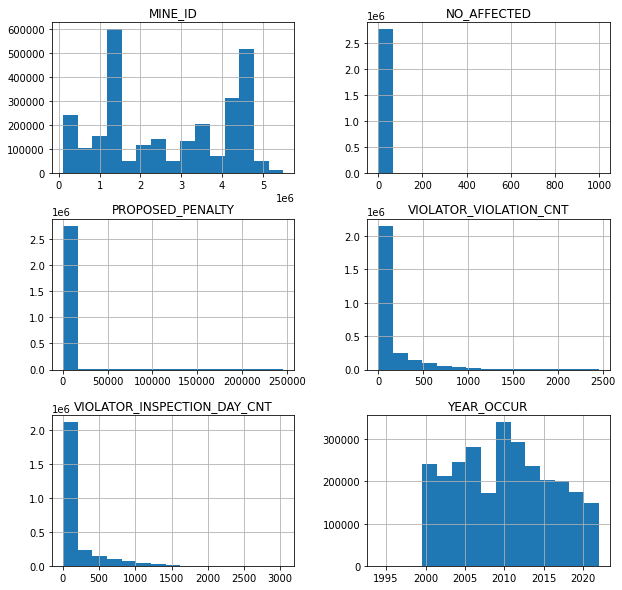

In [ ]:
hist = violation_data.hist(figsize=(10,10), bins=15)

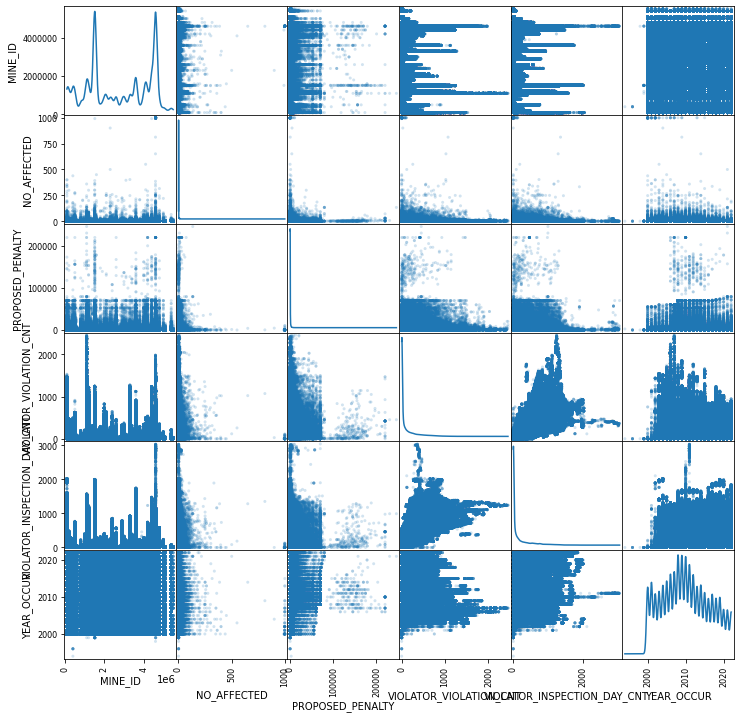

In [ ]:
scat_mat = pd.plotting.scatter_matrix(violation_data, alpha=0.2, figsize=(12, 12), diagonal="kde")

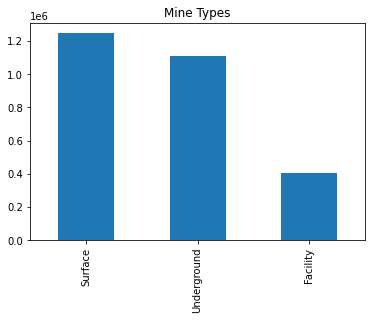

In [ ]:
plt.title('Mine Types')
violation_data.MINE_TYPE.value_counts().plot.bar()

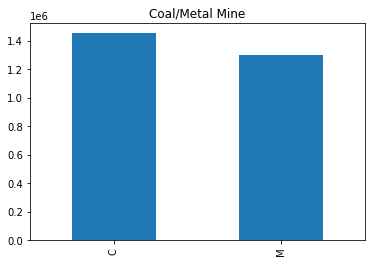

In [ ]:
plt.title('Coal/Metal Mine')
violation_data.COAL_METAL_IND.value_counts().plot.bar()

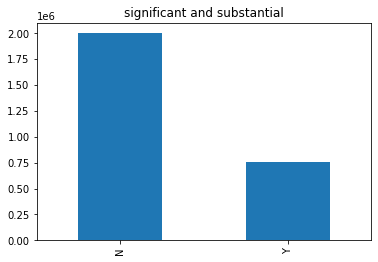

In [ ]:
plt.title('significant and substantial')
violation_data.SIG_SUB.value_counts().plot.bar()

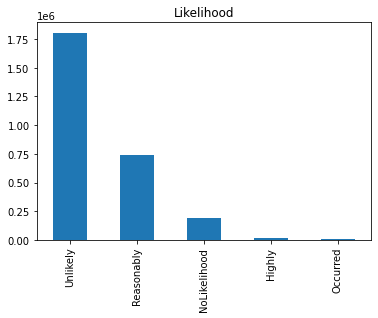

In [ ]:
plt.title('Likelihood')
violation_data.LIKELIHOOD.value_counts().plot.bar()

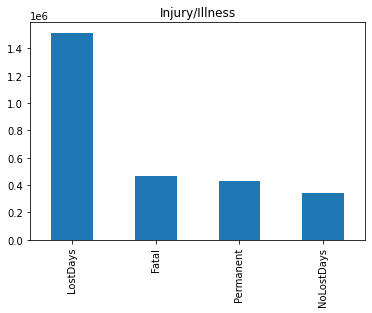

In [ ]:
plt.title('Injury/Illness')
violation_data.INJ_ILLNESS.value_counts().plot.bar()

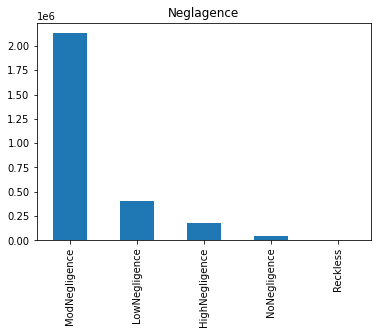

In [ ]:
plt.title('Neglagence')
violation_data.NEGLIGENCE.value_counts().plot.bar()

## Split Data by Year

In [ ]:
violations_data_between_2002_and_2012 = violation_data[violation_data['YEAR_OCCUR'] < 2012]
violations_data_between_2002_and_2012 = violations_data_between_2002_and_2012[violations_data_between_2002_and_2012['YEAR_OCCUR'] >= 2002]
violations_data_after_2010 = violation_data[violation_data['YEAR_OCCUR'] >= 2010]

print("Year Information:\n" + 20*'-')
print('Frist year: %d' % violation_data['YEAR_OCCUR'].min())
print('Last year: %d' %violation_data['YEAR_OCCUR'].max())
print('Average year: %d' % violation_data['YEAR_OCCUR'].mean())
print('# of samples with year < 2000: %d' % violation_data[violation_data['YEAR_OCCUR'] < 2000].shape[0])
print('# of samples with 2002 <= year < 2010: %d' % violations_data_between_2002_and_2012.shape[0])
print('# of samples with year >= 2010: %d' % violations_data_after_2010.shape[0])

Year Information:
--------------------
Frist year: 1994
Last year: 2022
Average year: 2010
# of samples with year < 2000: 43
# of samples with 2002 <= year < 2010: 1410099
# of samples with year >= 2010: 1429135


In [ ]:
path_after_2010 = '/content/gdrive/My Drive/NIOSH Project/data/violations_processed_after_2010.csv'
with open(path_after_2010, 'w', encoding='utf-8') as f:
  violations_data_after_2010.to_csv(f)

In [ ]:
path_between_2002_and_2012 = '/content/gdrive/My Drive/NIOSH Project/data/violations_processed_between_2002_and_2012.csv'
with open(path_between_2002_and_2012, 'w', encoding='utf-8') as f:
  violations_data_between_2002_and_2012.to_csv(f)

## Split By Mine Type / Coal

In [7]:
split_violation_data = {
    'surface': violation_data.query('MINE_TYPE == "Surface"'),
    'underground': violation_data.query('MINE_TYPE == "Underground"'),
    'facility': violation_data.query('MINE_TYPE == "Facility"'),
    'coal': violation_data.query('COAL_METAL_IND == "C"'),
    'metal': violation_data.query('COAL_METAL_IND == "M"')
}

In [8]:
for split, data in split_violation_data.items():
    path = f'/content/gdrive/My Drive/NIOSH Project/data/violations_processed_{split}.csv'
    with open(path, 'w', encoding='utf-8') as f:
        data.to_csv(f)